In [84]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score

In [93]:
#Pre-processing & Setup
#symbol and time period
symbol = 'ETH-USD'
start_date = '2018-01-01'
end_date = '2023-01-01'

#Download
eth_data = yf.download(symbol, start=start_date, end=end_date)
ordered_data = eth_data.sort_values(by=['Date'])

#Feature selection
features = ['Open', 'High', 'Low', 'Volume']
X = eth_data[features]
y = eth_data['Close']

#Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

#Getting Values for out test set


#Corrects Sizing
y_train = y_train.flatten()
y_test = y_test.flatten()



[*********************100%%**********************]  1 of 1 completed


SVR with PCA

In [69]:
def featureReduction(x_train, x_test, K):
  pca = PCA(n_components = K)
  x_train_tran = pca.fit_transform(x_train)
  x_test_tran = pca.fit_transform(x_test)
  return x_train_tran, x_test_tran

In [70]:
#Value Arrays
BestK_mse = 0
mse_scores = []
lowest_mse = float('inf')

BestK_R2 = 0
r2_scores = []
highest_r2 = float('-inf')

In [71]:
#Calculating Values
for K in range(1,5):
  xtrt, xtet = featureReduction(X_train, X_test, K)
  classifier = SVR(kernel= 'linear', C = 1E4)
  classifier.fit(xtrt, y_train)
  y_prediction = classifier.predict(xtet)

  #Get MSE scores
  current_mse = mean_squared_error(y_test, y_prediction)
  mse_scores.append(current_mse)

  #Get R2 Scores
  current_r2 = r2_score(y_test, y_prediction)
  r2_scores.append(current_r2)

  #Get Best K - MSE
  if current_mse < lowest_mse:
        lowest_mse = current_mse
        BestK_mse = K

  #Get Best K - R2
  if current_r2 > highest_r2:
        highest_r2 = current_r2
        BestK_R2 = K


#Display Values @ best K
print("Best K Value for MSE" , BestK_mse)
print("Lowest MSE at Best K:", lowest_mse)

print("Best K Value for R2" , BestK_R2)
print("Highest R2 at Best K:", highest_r2)


Best K Value for MSE 2
Lowest MSE at Best K: 0.004185726244882515
Best K Value for R2 2
Highest R2 at Best K: 0.9534983153614459


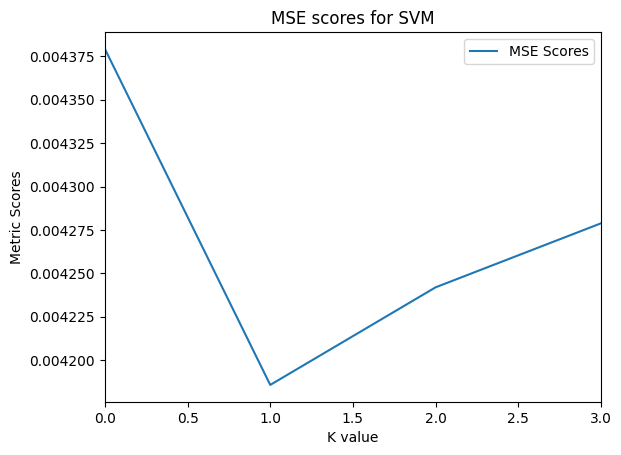

In [72]:
#Plot Arrays MSE
plt.plot(mse_scores, label= "MSE Scores")
plt.xlabel("K value")
plt.ylabel("Metric Scores")
plt.xlim(0,3)
plt.legend()
plt.title("MSE scores for SVM")
plt.show()

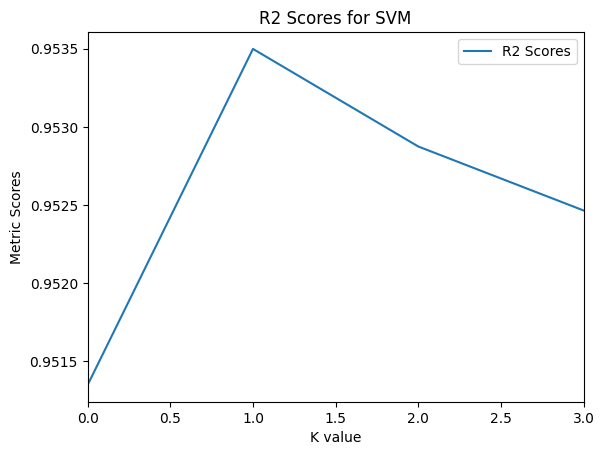

In [73]:
#Plot Arrays R2
plt.plot(r2_scores, label= "R2 Scores")
plt.xlabel("K value")
plt.ylabel("Metric Scores")
plt.xlim(0,3)
plt.legend()
plt.title("R2 Scores for SVM")
plt.show()

In [74]:
#Kernal Tricks - MSE
#Linear, Poly, RBF, & Sigmoid
K = BestK_mse
c = 1E4

xtrt, xtet = featureReduction(X_train, X_test, K)

#Linear
lin = SVR(kernel= 'linear', C= c)
lin.fit(xtrt, y_train)
lin_pred = lin.predict(xtet)
lin_acc = mean_squared_error(y_test, lin_pred)
print("Mean Squared Error - Linear:")
print(lin_acc)

#Poly
poly = SVR(kernel= 'poly', C= c)
poly.fit(xtrt, y_train)
poly_pred = poly.predict(xtet)
poly_acc = mean_squared_error(y_test, poly_pred)
print("Mean Squared Error - Poly:")
print(poly_acc)

#RBF
RBF = SVR(kernel= 'rbf', C= c)
RBF.fit(xtrt, y_train)
RBF_pred = RBF.predict(xtet)
RBF_acc = mean_squared_error(y_test, RBF_pred)
print("Mean Squared Error - RBF:")
print(RBF_acc)

#Sigmoid
sig = SVR(kernel= 'sigmoid', C= c)
sig.fit(xtrt, y_train)
sig_pred = sig.predict(xtet)
sig_acc = mean_squared_error(y_test, sig_pred)
print("Mean Squared Error - Sigmoid:")
print(sig_acc)

Mean Squared Error - Linear:
0.004185726244882515
Mean Squared Error - Poly:
0.027988442598156953
Mean Squared Error - RBF:
0.005297550465142187
Mean Squared Error - Sigmoid:
4942063634.8327


In [75]:
#Kernal Tricks - R2
#Linear, Poly, RBF, & Sigmoid
K = BestK_R2
c = 1E4

xtrt, xtet = featureReduction(X_train, X_test, K)

#Linear
lin = SVR(kernel= 'linear', C= c)
lin.fit(xtrt, y_train)
lin_pred = lin.predict(xtet)
lin_acc = r2_score(y_test, lin_pred)
print("R2 - Linear:")
print(lin_acc)

#Poly
poly = SVR(kernel= 'poly', C= c)
poly.fit(xtrt, y_train)
poly_pred = poly.predict(xtet)
poly_acc = r2_score(y_test, poly_pred)
print("R2 - Poly:")
print(poly_acc)

#RBF
RBF = SVR(kernel= 'rbf', C= c)
RBF.fit(xtrt, y_train)
RBF_pred = RBF.predict(xtet)
RBF_acc = r2_score(y_test, RBF_pred)
print("R2 - RBF:")
print(RBF_acc)

#Sigmoid
sig = SVR(kernel= 'sigmoid', C= c)
sig.fit(xtrt, y_train)
sig_pred = sig.predict(xtet)
sig_acc = r2_score(y_test, sig_pred)
print("R2 - Sigmoid:")
print(sig_acc)

R2 - Linear:
0.9534983153614459
R2 - Poly:
0.689059996980214
R2 - RBF:
0.9411464088488707
R2 - Sigmoid:
-54904279726.23447


ValueError: x and y must have same first dimension, but have shapes (366,) and (73,)

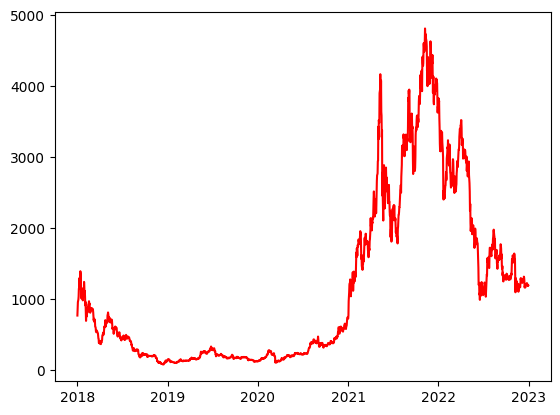

In [92]:
#Predicting Outputs
plt.figure()
plt.plot(ordered_data.index, ordered_data['Close'], color='red', label='Close Prices')
plt.plot(y_test_graph.index, lin_pred, color='blue', label=' RBF Predicted Close Prices')
plt.title('Ethereum Close Price using SVR with a Linear Kernal')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

SVR Without PCA

In [76]:
#Calculating Values
for K in range(1,5):
  xtrt, xtet = X_train, X_test
  classifier = SVR(kernel= 'linear', C = 1E4)
  classifier.fit(xtrt, y_train)
  y_prediction = classifier.predict(xtet)

  #Get MSE scores
  current_mse = mean_squared_error(y_test, y_prediction)
  mse_scores.append(current_mse)

  #Get R2 Scores
  current_r2 = r2_score(y_test, y_prediction)
  r2_scores.append(current_r2)

  #Get Best K - MSE
  if current_mse < lowest_mse:
        lowest_mse = current_mse
        BestK_mse = K

  #Get Best K - R2
  if current_r2 > highest_r2:
        highest_r2 = current_r2
        BestK_R2 = K


#Display Values @ best K
print("Best K Value for MSE" , BestK_mse)
print("Lowest MSE at Best K:", lowest_mse)

print("Best K Value for R2" , BestK_R2)
print("Highest R2 at Best K:", highest_r2)

Best K Value for MSE 1
Lowest MSE at Best K: 0.003092322903040498
Best K Value for R2 1
Highest R2 at Best K: 0.9656455735456719


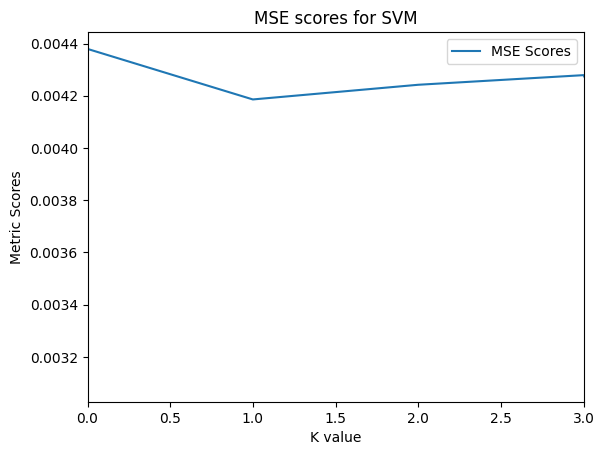

In [77]:
#Plot Arrays MSE
plt.plot(mse_scores, label= "MSE Scores")
plt.xlabel("K value")
plt.ylabel("Metric Scores")
plt.xlim(0,3)
plt.legend()
plt.title("MSE scores for SVM")
plt.show()

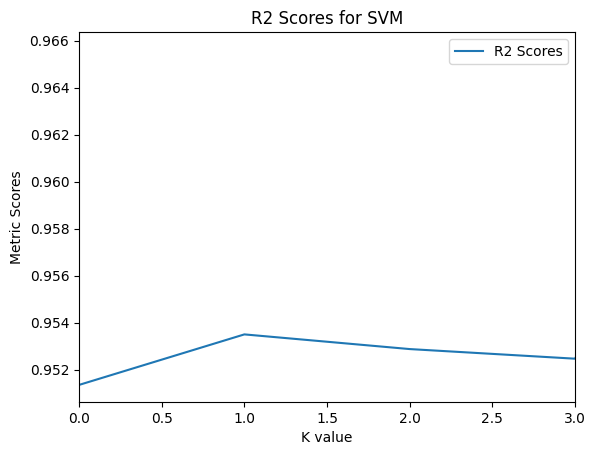

In [78]:
#Plot Arrays R2
plt.plot(r2_scores, label= "R2 Scores")
plt.xlabel("K value")
plt.ylabel("Metric Scores")
plt.xlim(0,3)
plt.legend()
plt.title("R2 Scores for SVM")
plt.show()

In [79]:
#Kernal Tricks - MSE
#Linear, Poly, RBF, & Sigmoid
K = BestK_mse
c = 1E4

xtrt, xtet = X_train, X_test

#Linear
lin = SVR(kernel= 'linear', C= c)
lin.fit(xtrt, y_train)
lin_pred = lin.predict(xtet)
lin_acc = mean_squared_error(y_test, lin_pred)
print("Mean Squared Error - Linear:")
print(lin_acc)

#Poly
poly = SVR(kernel= 'poly', C= c)
poly.fit(xtrt, y_train)
poly_pred = poly.predict(xtet)
poly_acc = mean_squared_error(y_test, poly_pred)
print("Mean Squared Error - Poly:")
print(poly_acc)

#RBF
RBF = SVR(kernel= 'rbf', C= c)
RBF.fit(xtrt, y_train)
RBF_pred = RBF.predict(xtet)
RBF_acc = mean_squared_error(y_test, RBF_pred)
print("Mean Squared Error - RBF:")
print(RBF_acc)

#Sigmoid
sig = SVR(kernel= 'sigmoid', C= c)
sig.fit(xtrt, y_train)
sig_pred = sig.predict(xtet)
sig_acc = mean_squared_error(y_test, sig_pred)
print("Mean Squared Error - Sigmoid:")
print(sig_acc)

Mean Squared Error - Linear:
0.003092322903040498
Mean Squared Error - Poly:
0.03243907683750314
Mean Squared Error - RBF:
0.0024028237777091906
Mean Squared Error - Sigmoid:
29722852212.155037


In [80]:
#Kernal Tricks - R2
#Linear, Poly, RBF, & Sigmoid
K = BestK_R2
c = 1E4

xtrt, xtet = X_train, X_test

#Linear
lin = SVR(kernel= 'linear', C= c)
lin.fit(xtrt, y_train)
lin_pred = lin.predict(xtet)
lin_acc = r2_score(y_test, lin_pred)
print("R2 - Linear:")
print(lin_acc)

#Poly
poly = SVR(kernel= 'poly', C= c)
poly.fit(xtrt, y_train)
poly_pred = poly.predict(xtet)
poly_acc = r2_score(y_test, poly_pred)
print("R2 - Poly:")
print(poly_acc)

#RBF
RBF = SVR(kernel= 'rbf', C= c)
RBF.fit(xtrt, y_train)
RBF_pred = RBF.predict(xtet)
RBF_acc = r2_score(y_test, RBF_pred)
print("R2 - RBF:")
print(RBF_acc)

#Sigmoid
sig = SVR(kernel= 'sigmoid', C= c)
sig.fit(xtrt, y_train)
sig_pred = sig.predict(xtet)
sig_acc = r2_score(y_test, sig_pred)
print("R2 - Sigmoid:")
print(sig_acc)

R2 - Linear:
0.9656455735456719
R2 - Poly:
0.6396152942616213
R2 - RBF:
0.9733056232022674
R2 - Sigmoid:
-330208575349.05286
